# Import

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np 
import random
import pandas as pd

# Random data

In [2]:
seed,n,m=1,10,2
random.seed(seed)
w=[-1+2*random.random(),random.random()]
b=[random.random(),random.random()]

random.seed(seed)
dataPointSet=[]
i=0
label=[]
while i<n:
    dataPointSet.append([])
    for j in range(m):
        dataPointSet[-1].append(-10+random.random()*20)
    x=dataPointSet[-1]
    if w[0]*x[0]+w[1]*x[1]>=b[1]:
            #x.append([1,0,0])
        label.append(1)
        i=i+1
    elif w[0]*x[0]+w[1]*x[1]<=b[0]:
        label.append(-1)
        i=i+1
    else:
        dataPointSet.remove(x)

#label = [1, -1, -1, 1, -1, -1, -1, 1, 1, -1]
label = [1, -1, -1, -1, 1, -1, -1, 1, 1, -1]

In [3]:
dataPointSet

[[-7.312715117751976, 6.9486747387446535],
 [5.275492379532281, -4.898619485211566],
 [-0.09129825816118142, -1.010178704225238],
 [3.031859454455258, 5.7744670227102635],
 [-8.122808264515303, -9.433050469559873],
 [6.715302078397393, -1.344658641898933],
 [5.245601649158839, -9.957878932977787],
 [-1.092256118903972, 4.430800646815651],
 [-5.424755574590947, 8.905413911078448],
 [8.028549152229672, -9.388200339328929]]

In [4]:
label

[1, -1, -1, -1, 1, -1, -1, 1, 1, -1]

# Functions

In [5]:
def determineStepSize(x,d,r):
    n=len(d)
    stepSize=float("inf")
    for i in range(n):
        if d[i] < 0 and stepSize>-x[i]/d[i]:
            stepSize=-x[i]/d[i]
    stepSize=min([1,r*stepSize])
    return stepSize

def createA(x,y,m,n):
    A = [[] for i in range(m)]

    for i in range(m):
        A[i].append(x[i][0]*y[i])
        A[i].append(x[i][0]*y[i]*(-1))
        A[i].append(x[i][1]*y[i])
        A[i].append(x[i][1]*y[i]*(-1))
        A[i].append(y[i])
        A[i].append(y[i]*(-1))
        for j in range(6,6+i):
            A[i].append(0)
        A[i].append(-1)
        for k in range(7+i,6+m+i):
            A[i].append(0)
        A[i].append(1)
        for l in range(7+m+i,n):
            A[i].append(0)

    A = np.array(A)
    return (A)

def refresh_c(c,w,C,m,n):
    c[0,0] = w[0,0]
    c[1,0] = -w[0,0]
    c[2,0] = w[1,0]
    c[3,0] = -w[1,0]
    for j in range(4,6+m):
        c[j,0] = 0
    for j in range(6+m,n):
        c[j,0] = C
    return (c)

def assembleBarA(A,m,n,S,X):
    A1=np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
    A2=np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))
    A3=np.hstack((S,np.zeros((n,m)),X))
    barA=np.vstack((A1,A2,A3))
    return(barA)

def determineDelta(barA,residual,m,n):
    NewtonDirection=np.linalg.inv(barA).dot(residual)
    delta_z=NewtonDirection[0:n,0].reshape(n,1)
    delta_y=NewtonDirection[n:n+m,0].reshape(m,1)
    delta_s=NewtonDirection[n+m:2*n+m,0].reshape(n,1)
    return (delta_z,delta_y,delta_s)

# Assignments

In [6]:
n = len(dataPointSet)
m = 6 + 2 * n

C = 0.01
r=0.99
epsilon=1e-6

mu_0=10
mu=[]
mu.append(mu_0)

z0 = np.ones((m, 1))
y0 = np.ones((n, 1))
s0 = np.ones((m, 1))

e=np.ones((m,1))
w = np.ones((2, 1))

A = createA(dataPointSet,label,n,m)
b = np.ones((n, 1))
c = np.zeros((m, 1))

# Main

In [7]:
iterationNo=[]
iterationX=[]
iterationX5=[]
iterationX6=[]
iterationX7=[]
iterationX8=[]
for i in range(m):
    iterationX.append([])

c = refresh_c(c,w,C,n,m)

k=0

while mu[k]>epsilon*mu_0:
    X=np.diag(z0[:,0])
    S=np.diag(s0[:,0])

    r1=b-A.dot(z0)
    r2=c-A.transpose().dot(y0)-s0
    r3=mu[k]*e-X.dot(S).dot(e)
    residual=np.vstack((r1,r2,r3))

    barA = assembleBarA(A,n,m,S,X)

    iterationNo.append(k)
    for i in range(m):
        iterationX[i].append(z0[i,0])

    iterationX5.append(r1.transpose().dot(r1)[0,0])
    iterationX6.append(r2.transpose().dot(r2)[0,0])
    iterationX7.append(z0.transpose().dot(s0)[0,0])

    delta_z,delta_y,delta_s = determineDelta(barA,residual,n,m)

    stepSizeZ=determineStepSize(z0,delta_z,r)
    stepSizeS=determineStepSize(s0,delta_s,r)
    z0=z0+stepSizeZ*delta_z
    y0=y0+stepSizeS*delta_y
    s0=s0+stepSizeS*delta_s

    for i in range(2):
        w[i,0] = z0[2*i,0]-z0[2*i+1,0]

    c = refresh_c(c,w,C,n,m)


    mu.append((1/10)*z0.transpose().dot(s0)/m)
    iterationX8.append(c.transpose().dot(z0)[0,0])
    k=k+1

Table={"k":iterationNo}
for i in range(m):
    Table["$z_{"+str(i+1)+"}$"]=iterationX[i]
Table["norm($r_1$)"]=iterationX5
Table["norm($r_2$)"]=iterationX6
Table["$z^{t}s$"]=iterationX7
Table["$c^tz$"]=iterationX8

Table=pd.DataFrame(Table).set_index("k")
Table


,$z_{1}$,$z_{2}$,$z_{3}$,$z_{4}$,$z_{5}$,$z_{6}$,$z_{7}$,$z_{8}$,$z_{9}$,$z_{10}$,...,$z_{21}$,$z_{22}$,$z_{23}$,$z_{24}$,$z_{25}$,$z_{26}$,norm($r_1$),norm($r_2$),$z^{t}s$,$c^tz$
k,,,,,,,,,,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+01,7170.036784,26.000000,1.133358
1,10.920909,11.079091,11.001910,10.998090,10.954873,11.045127,11.041515,10.966728,10.534835,10.768895,...,10.915695,10.916182,11.015975,11.445278,11.094070,10.796956,1.436673e-26,700.655826,91.406945,1.226934
2,12.005380,12.197498,12.103338,12.096261,12.026367,12.178554,12.074280,12.005115,11.418272,11.715205,...,11.757075,11.711488,11.791481,12.339468,11.918408,11.604531,8.256998e-24,1.042692,5.183335,1.095760
3,13.606367,13.723233,13.847345,13.459084,13.232326,14.041624,10.641498,11.115197,10.007827,8.234247,...,11.868055,9.189858,8.059591,9.878866,8.831707,7.492203,4.850706e-27,0.283496,1.072397,1.360169
4,14.471155,15.165441,14.358636,14.764542,14.314113,14.777131,8.917254,9.132823,7.960575,10.137765,...,0.118681,7.140729,7.667434,9.380688,8.565420,7.148773,1.292447e-23,1.185916,0.812072,0.693639
5,15.184572,15.305139,15.133494,15.079959,15.062944,14.635964,8.445929,7.580453,7.301868,4.574727,...,0.179914,7.452179,7.079427,7.899162,7.267249,7.240230,8.455873e-24,0.036222,0.732708,0.808559
6,19.735747,19.571661,19.881484,19.297835,18.996408,20.150038,5.293501,5.930928,5.415908,0.045747,...,9.183454,4.474281,2.812182,4.712212,3.900813,2.222970,2.132282e-22,0.741557,0.436743,0.348252
7,24.637296,24.893492,24.872373,24.816671,24.791655,25.000430,4.763654,4.251744,3.518025,0.682168,...,0.091835,3.312792,2.389368,4.184336,3.478632,2.069253,2.490441e-20,0.028696,0.304726,0.233008
8,31.462178,31.588507,31.571285,31.558244,31.698660,31.594249,3.016615,2.350305,2.158183,0.006822,...,0.147354,2.719195,1.741875,3.074440,2.624338,1.694072,1.062773e-20,0.025821,0.209889,0.145810


# Plot

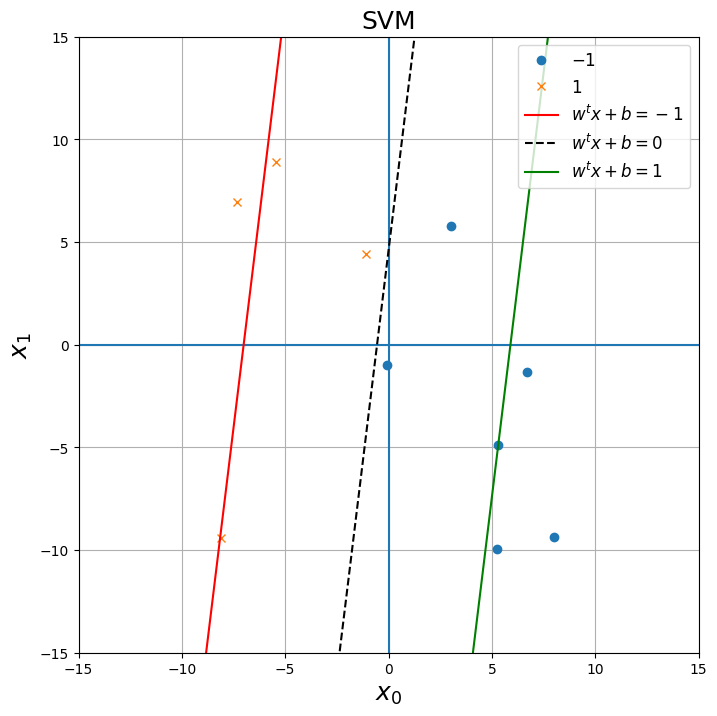

In [8]:
#Check if the lists:dataPointSet and label are set before you run this cell.
n = len(dataPointSet)
m = len(dataPointSet[0])
fig, ax = plt.subplots(figsize=(8,8))

ax.plot([dataPointSet[i][0] for i in range(n) if label[i]==-1],[dataPointSet[i][1] for i in range(n) if label[i]==-1],'o',label='$-1$')
ax.plot([dataPointSet[i][0] for i in range(n) if label[i]==1],[dataPointSet[i][1] for i in range(n) if label[i]==1],'x',label='$1$')
ax.axhline(y=0, xmin=-4, xmax=16)
ax.axvline(x=0, ymin=0, ymax=16)
#for i in range(n):
#    ax.text(dataPointSet[i][0],dataPointSet[i][1],'  %d' % (i),fontsize=18)

b = z0[4,0]-z0[5,0]
slope = -w[0,0] / w[1,0]

x = np.linspace(-15, 15, 100)

y0 = slope * x+ (1-b)/ w[1,0]
ax.plot(x, y0, 'r-', label='$w^t x + b = -1$')

y1 = slope * x + (-b)/ w[1,0]
ax.plot(x, y1, 'k--', label='$w^t x + b = 0$')

y2 = slope * x + (-1-b)/ w[1,0]
ax.plot(x, y2, 'g-', label='$w^t x + b = 1$', )

plt.xlim([-15, 15])
plt.ylim([-15, 15])
ax.set_xlabel('$x_0$',fontsize=18)
ax.set_ylabel('$x_1$',fontsize=18)
ax.set_title('SVM',fontsize=18)
ax.legend(loc='upper right',fontsize=12)
ax.grid()